# Competition Notebook 0
## Load Data


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load in training data on each potential synapse
data = pd.read_csv("neuron-synapse-prediction/train_data.csv")

#load in additional features for each neuron
feature_weights = pd.read_csv("neuron-synapse-prediction/feature_weights.csv")
morph_embeddings = pd.read_csv("neuron-synapse-prediction/morph_embeddings.csv")


### Basic Info

In [16]:
print("Main Dataframe Size:",data.shape)
print("\nMain Dataframe:")
data.info()

print("\nFeature Weights Size:",feature_weights.shape)
print("\nFeature Weights:")
feature_weights.info(verbose=False)

print("\nMorphological Embeddings Size:",morph_embeddings.shape)
print("\nMorphological Embeddings:")
morph_embeddings.info(verbose=False)

Main Dataframe Size: (185832, 30)

Main Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185832 entries, 0 to 185831
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              185832 non-null  int64  
 1   axonal_coor_x                   185832 non-null  int64  
 2   axonal_coor_y                   185832 non-null  int64  
 3   axonal_coor_z                   185832 non-null  int64  
 4   dendritic_coor_x                185832 non-null  int64  
 5   dendritic_coor_y                185832 non-null  int64  
 6   dendritic_coor_z                185832 non-null  int64  
 7   adp_dist                        185832 non-null  float64
 8   post_skeletal_distance_to_soma  185832 non-null  float64
 9   pre_skeletal_distance_to_soma   185832 non-null  float64
 10  pre_oracle                      185832 non-null  float64
 11  pre_test_score             

## Merge Data

In [17]:
# join all feature_weight_i columns into a single np.array column
feature_weights["feature_weights"] = (
    feature_weights.filter(regex="feature_weight_")
    .sort_index(axis=1)
    .apply(lambda x: np.array(x), axis=1)
)
# delete the feature_weight_i columns
feature_weights.drop(
    feature_weights.filter(regex="feature_weight_").columns, axis=1, inplace=True
)

# join all morph_embed_i columns into a single np.array column
morph_embeddings["morph_embeddings"] = (
    morph_embeddings.filter(regex="morph_emb_")
    .sort_index(axis=1)
    .apply(lambda x: np.array(x), axis=1)
)
# delete the morph_embed_i columns
morph_embeddings.drop(
    morph_embeddings.filter(regex="morph_emb_").columns, axis=1, inplace=True
)

In [18]:
data = (
    data.merge(
        feature_weights.rename(columns=lambda x: "pre_" + x), 
        how="left", 
        validate="m:1",
        copy=False,
    )
    .merge(
        feature_weights.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "pre_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
)

In [19]:
print("Data Size:",data.shape)
print("\nData:")
data.info()

Data Size: (185832, 34)

Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185832 entries, 0 to 185831
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              185832 non-null  int64  
 1   axonal_coor_x                   185832 non-null  int64  
 2   axonal_coor_y                   185832 non-null  int64  
 3   axonal_coor_z                   185832 non-null  int64  
 4   dendritic_coor_x                185832 non-null  int64  
 5   dendritic_coor_y                185832 non-null  int64  
 6   dendritic_coor_z                185832 non-null  int64  
 7   adp_dist                        185832 non-null  float64
 8   post_skeletal_distance_to_soma  185832 non-null  float64
 9   pre_skeletal_distance_to_soma   185832 non-null  float64
 10  pre_oracle                      185832 non-null  float64
 11  pre_test_score                  185832 non-null

In [20]:
data.head()

,ID,axonal_coor_x,axonal_coor_y,axonal_coor_z,dendritic_coor_x,dendritic_coor_y,dendritic_coor_z,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,...,post_nucleus_x,post_nucleus_y,post_nucleus_z,pre_nucleus_id,post_nucleus_id,connected,pre_feature_weights,post_feature_weights,pre_morph_embeddings,post_morph_embeddings
0,42593,1187660,411978,1089020,1187390,412220,1089160,304.185,353043.0,1182170.0,...,1196352,492736,919560,557121,518848,False,"[0.40828925, 0.051097646, -0.02682111, 0.04239...","[-0.03917461, -0.1830603, -0.3704222, 0.183293...","[0.3733156323432922, 0.209817960858345, -0.123...","[1.0723994970321655, -0.7540942430496216, 0.11..."
1,42594,1204580,682542,873138,1204640,682870,873890,725.431,244156.0,914243.0,...,1196352,492736,919560,557121,518848,False,"[0.40828925, 0.051097646, -0.02682111, 0.04239...","[-0.03917461, -0.1830603, -0.3704222, 0.183293...","[0.3733156323432922, 0.209817960858345, -0.123...","[1.0723994970321655, -0.7540942430496216, 0.11..."
2,42595,1191790,403683,1093180,1188590,402414,1092660,3423.030,363829.0,1171820.0,...,1196352,492736,919560,557121,518848,False,"[0.40828925, 0.051097646, -0.02682111, 0.04239...","[-0.03917461, -0.1830603, -0.3704222, 0.183293...","[0.3733156323432922, 0.209817960858345, -0.123...","[1.0723994970321655, -0.7540942430496216, 0.11..."
3,42596,1184320,419286,1082930,1186620,419721,1085540,3442.390,344267.0,1192340.0,...,1196352,492736,919560,557121,518848,False,"[0.40828925, 0.051097646, -0.02682111, 0.04239...","[-0.03917461, -0.1830603, -0.3704222, 0.183293...","[0.3733156323432922, 0.209817960858345, -0.123...","[1.0723994970321655, -0.7540942430496216, 0.11..."
4,42597,1189150,673302,944202,1188790,677771,942901,4442.380,313630.0,788566.0,...,1196352,492736,919560,557121,518848,False,"[0.40828925, 0.051097646, -0.02682111, 0.04239...","[-0.03917461, -0.1830603, -0.3704222, 0.183293...","[0.3733156323432922, 0.209817960858345, -0.123...","[1.0723994970321655, -0.7540942430496216, 0.11..."


## Basic Exploratory Analysis

In [21]:
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
print("Number Connected (Synapses):",data['connected'].sum())

print("\nNumber Not Connected:",(~data['connected']).sum())

Number Connected (Synapses): 1366

Number Not Connected: 184466


In [23]:
print(f"All the adps are from {data['pre_nucleus_id'].nunique()} pre- neurons and {data['post_nucleus_id'].nunique()} post- neurons.")

All the adps are from 77 pre- neurons and 2663 post- neurons.


Note that we see unbalance between Connected and Non-Connected and between pre-neurons and post-neurons

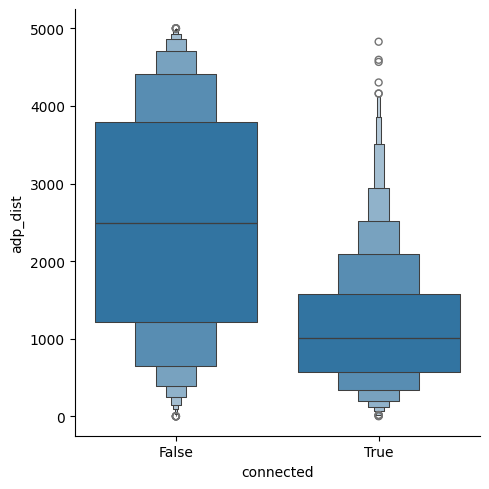

In [24]:
sns.catplot(data=data, x='connected', y='adp_dist', kind='boxen')

# ...

In [25]:
#cosine similarity function
def row_feature_similarity(row):
    pre = row["pre_feature_weights"]
    post = row["post_feature_weights"]
    return (pre * post).sum() / (np.linalg.norm(pre) * np.linalg.norm(post))

In [26]:
# compute the cosine similarity between the pre- and post- feature weights
data["fw_similarity"] = data.apply(row_feature_similarity, axis=1)

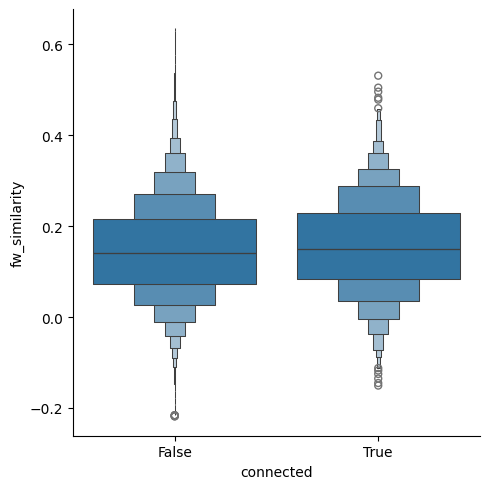

In [27]:
#visualize these results
sns.catplot(data=data, x='connected', y='fw_similarity', kind='boxen')

# ... 

In [28]:
# generate projection group as pre->post
data["projection_group"] = (
    data["pre_brain_area"].astype(str)
    + "->"
    + data["post_brain_area"].astype(str)
)

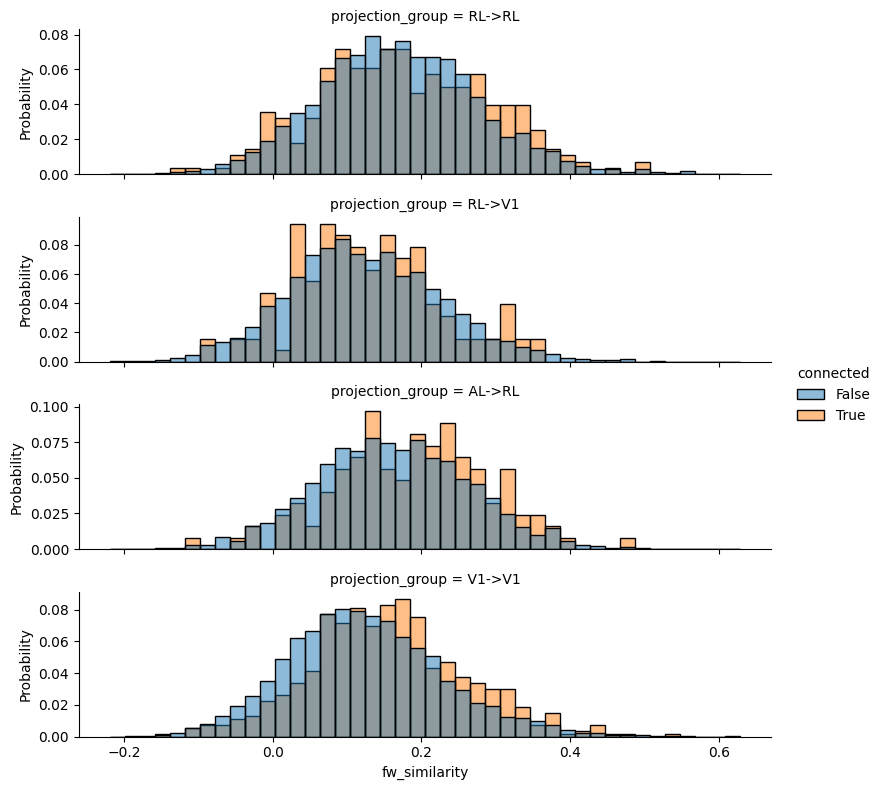

In [29]:
# check the distribution of the cosine similarity for projections groups with more than 100 synapses
projection_group_counts = data.query('connected')['projection_group'].value_counts()
projection_group_counts = projection_group_counts[projection_group_counts > 100].index
sns.displot(
    data=data.query('projection_group in @projection_group_counts'), 
    x='fw_similarity', 
    hue='connected', 
    row='projection_group',
    common_norm=False, 
    stat='probability',
    binwidth=.02,
    height=2,
    aspect=4,
    facet_kws={'sharey': False}
)

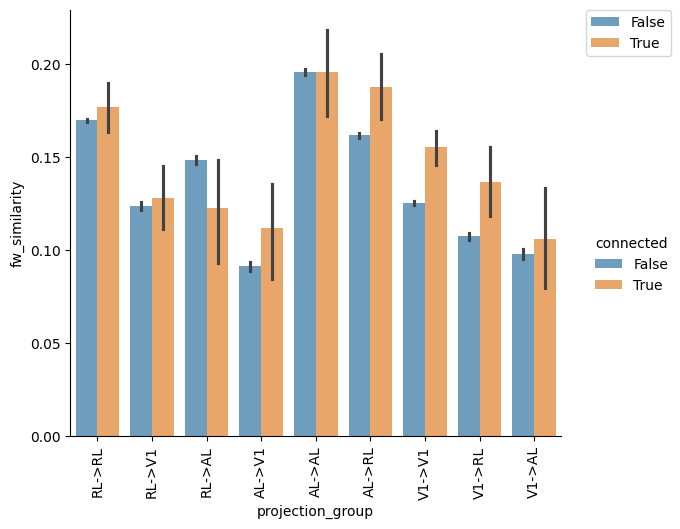

In [30]:
sns.catplot(data=data, x='projection_group', y='fw_similarity', hue='connected', kind='bar', alpha=.7)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xticks(rotation=90);

In [31]:
import xgboost
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression

In [32]:
# logistic regression model (connected ~ fw_similarity + adp)
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# split into a train and test set 
#(Even though we're working with the competition training set, you may want to have your own internal train and test sets.)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)

#create model
#
#calibrated_svc = CalibratedClassifierCV(svc, method='isotonic')

Cs = np.logspace(-2,3,50)

#model =  LogisticRegressionCV(Cs=Cs, cv=5, solver='saga', penalty='l1', scoring='balanced_accuracy')
svc = SVC(kernel = 'poly')
model = CalibratedClassifierCV(svc, method='isotonic')

# create pipeline
pipe = Pipeline(
    [("scaler", StandardScaler()), ("model",model)]
)

# fit model
#pipe.fit(train_data[["fw_similarity", "adp_dist"]], train_data["connected"])

# predict on test data
#test_data["pred"] = pipe.predict_proba(test_data[["fw_similarity", "adp_dist"]])[:, 1]

# compute accuracy
#print(f"accuracy: {accuracy_score(test_data['connected'], test_data['pred'] > .5)}")

In [33]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# oversample connected neuron pairs

#ros = RandomOverSampler(random_state=0)

oversample = SMOTE()
#oversample = ADASYN()
X_resampled, y_resampled = oversample.fit_resample(
    train_data[["fw_similarity", "adp_dist"]], train_data["connected"]
)

# fit model
pipe.fit(X_resampled, y_resampled)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 CalibratedClassifierCV(estimator=SVC(kernel='poly'),
                                        method='isotonic'))])

In [34]:
# predict on test data
test_data["pred"] = pipe.predict_proba(test_data[["fw_similarity", "adp_dist"]])[:, 1]

# compute accuracy
print(f"accuracy: {accuracy_score(test_data['connected'], test_data['pred'] > .5)}")

# confusion matrix
print(confusion_matrix(test_data['connected'], test_data['pred'] > .5))

# compute balanced accuracy
print(
    f"balanced accuracy: {balanced_accuracy_score(test_data['connected'], test_data['pred'] > .5)}"
)

accuracy: 0.5514838431942315
[[20253 16643]
 [   27   244]]
balanced accuracy: 0.7246451479855215


In [35]:
#we need to first load and merge the leaderboard data to have the same format as the training set
lb_data = pd.read_csv("neuron-synapse-prediction/leaderboard_data.csv")

In [36]:
lb_data = (
    lb_data.merge(
        feature_weights.rename(columns=lambda x: "pre_" + x), 
        how="left", 
        validate="m:1",
        copy=False,
    )
    .merge(
        feature_weights.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "pre_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
)

In [37]:
lb_data.shape
lb_data.head

<bound method NDFrame.head of           ID  axonal_coor_x  axonal_coor_y  axonal_coor_z  dendritic_coor_x  \
0          0         527499         544761         912282            529457   
1          1        1269890         471870         837816           1271230   
2          2         666057         469875         925239            665387   
3          3         696633         453516         925806            696648   
4          4         567525         585921         888426            570714   
...      ...            ...            ...            ...               ...   
42588  42588         765513         818622         870114            766346   
42589  42589         784476         609000         828177            782564   
42590  42590         766038         773808         861693            763428   
42591  42591         738276         614460         855099            741617   
42592  42592         769314         457443         874419            771959   

       dendritic_coor

In [38]:
# compute the cosine similarity between the pre- and post- feature weights
lb_data["fw_similarity"] = lb_data.apply(row_feature_similarity, axis=1)

In [39]:
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(
    data[["fw_similarity", "adp_dist"]], data["connected"]
)

# fit model
pipe.fit(X_resampled, y_resampled)

# predict on leaderboard data
lb_data["pred"] = pipe.predict_proba(lb_data[["fw_similarity", "adp_dist"]])[:, 1]

#create a boolean prediction solution
lb_data["connected"] = lb_data["pred"] > .5

In [40]:
#columns should be ID, connected
submission_data = lb_data.filter(['ID','connected'])

In [41]:
#writing csv files
submission_data.to_csv('submission_2.csv',index=False)